# Kittara 2002

This notebook will recreate some of the plots from:

> P. Kittara, “The Development of a 700 GHz SIS Mixer with Nb Finline Devices: Nonlinear Mixer Theory, Design Techniques and Experimental Investigation,” University of Cambridge, 2002.

In [1]:
# Std modules
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl 

# QMix
import qmix
from qmix.qtcurrent import qtcurrent
from qmix.respfn import RespFn, RespFnPolynomial
from qmix.mathfn.ivcurve_models import polynomial
from qmix.mathfn.kktrans import kk_trans
from qmix.harmonic_balance import harmonic_balance

Set plotting style to mimick the plots in his thesis.

In [2]:
# X axis
mpl.rcParams['xtick.top']         = True
mpl.rcParams['xtick.direction']   = 'in'
mpl.rcParams['xtick.labelsize']   = 14
mpl.rcParams['xtick.major.size']  = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size']  = 2
mpl.rcParams['xtick.minor.width'] = 1

# Y axis
mpl.rcParams['ytick.right']       = True
mpl.rcParams['ytick.direction']   = 'in'
mpl.rcParams['ytick.labelsize']   = 14
mpl.rcParams['ytick.major.size']  = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size']  = 2
mpl.rcParams['ytick.minor.width'] = 1

# Figure 5.4

In [3]:
# bias voltage sweep
voltage = np.linspace(-5, 5, 1001)

# DC current
current1 = polynomial(voltage, 10)
current2 = polynomial(voltage, 30)
current3 = polynomial(voltage, 50)
current4 = polynomial(voltage, 100)

# Kramers-Kronig transform
current_kk1 = kk_trans(voltage, current1)
current_kk2 = kk_trans(voltage, current2)
current_kk3 = kk_trans(voltage, current3)
current_kk4 = kk_trans(voltage, current4)

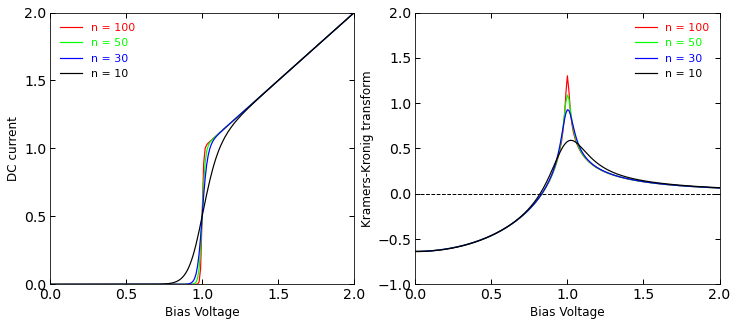

In [4]:
color_cycle = ['r', 'lime', 'b', 'k']

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(voltage, current4, label='n = 100', linewidth=1.2, c=color_cycle[0])
plt.plot(voltage, current3, label='n = 50',  linewidth=1.2, c=color_cycle[1])
plt.plot(voltage, current2, label='n = 30',  linewidth=1.2, c=color_cycle[2])
plt.plot(voltage, current1, label='n = 10',  linewidth=1.2, c=color_cycle[3])
plt.yticks(np.arange(0, 2.1, 0.5))
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.xlabel('Bias Voltage', fontsize=12)
plt.ylabel('DC current', fontsize=12)
leg = plt.legend(loc=0, frameon=False, fontsize=11)
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color=color_cycle[i])
    
plt.subplot(122)
plt.plot(voltage, current_kk4, label='n = 100', linewidth=1.2, c=color_cycle[0])
plt.plot(voltage, current_kk3, label='n = 50',  linewidth=1.2, c=color_cycle[1])
plt.plot(voltage, current_kk2, label='n = 30',  linewidth=1.2, c=color_cycle[2])
plt.plot(voltage, current_kk1, label='n = 10',  linewidth=1.2, c=color_cycle[3])
plt.axhline(0, color='k', linestyle='--', lw=1)
plt.yticks(np.arange(-1, 2.1, 0.5))
plt.xlim([0, 2])
plt.ylim([-1, 2])
plt.xlabel('Bias Voltage', fontsize=12)
plt.ylabel('Kramers-Kronig transform', fontsize=12)
leg = plt.legend(loc=0, frameon=False, fontsize=11)
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color=color_cycle[i]);

# Figure 5.5

In [5]:
# Response function
resp = RespFnPolynomial(50, verbose=False)

In [6]:
num_f = 1   # Number of tones
num_p = 1   # Number of harmonics
num_b = 15  # Maximum order of Bessel function

# Embedding circuit
cct = qmix.circuit.EmbeddingCircuit(num_f, num_p)

# Frequencies to calculate
freq_list = (0, cct.freq[1])

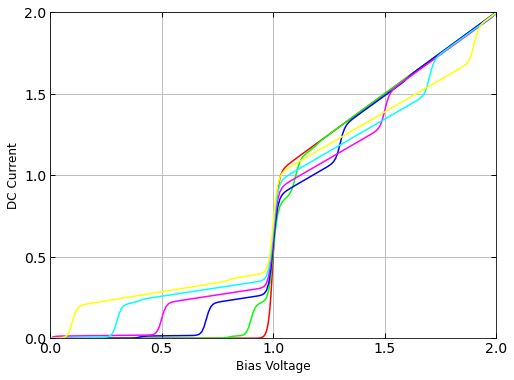

In [7]:
plt.figure(figsize=(8,6))
plt.plot(resp.voltage, resp.current, 'r')

w_list = [0.1, 0.3, 0.5, 0.7, 0.9]
colourlist = ['lime', 'b', 'magenta', 'cyan', 'yellow']
for i, wlo in enumerate(w_list):

    cct.freq[1] = wlo
    cct.vt[1, 1] = cct.freq[1] * 1.0

    # Harmonic Balance
    vj = harmonic_balance(cct, resp, num_b, verbose=False)

    # Calculate currents
    idc = qtcurrent(vj, cct, resp, 0., num_b, verbose=False)

    plt.plot(cct.vb, idc, colourlist[i], label=wlo)

plt.xlabel('Bias Voltage', fontsize=12)
plt.ylabel('DC Current', fontsize=12)
plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(0, 2.1, 0.5))
plt.ylim([0, 2])
plt.xlim([0, 2])
plt.grid();
# plt.legend(title='Vph');

# Figure 5.6

In [8]:
# Response function
resp = RespFnPolynomial(50, verbose=False)

In [9]:
num_f = 1   # Number of tones
num_p = 1   # Number of harmonics
num_b = 40  # Maximum order of Bessel function

# Embedding circuit
cct = qmix.circuit.EmbeddingCircuit(num_f, num_p)

# Frequencies to calculate
freq_list = (0, cct.freq[1])

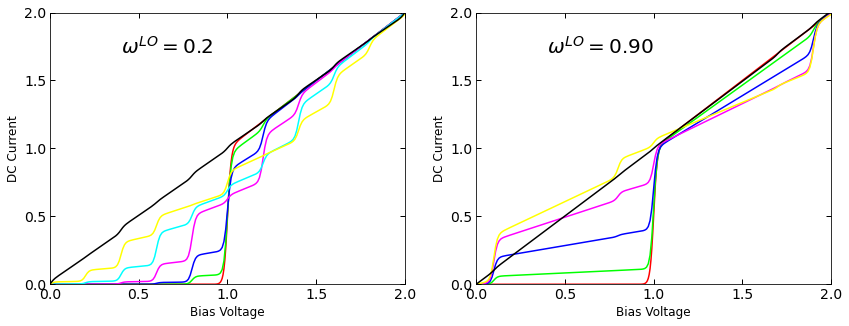

In [11]:
a_list1 = [0.5, 1.0, 2.0, 3.0, 4.0, 30.0]
a_list2 = [0.5, 1.0, 1.5, 2.0, 30.0]
colourlist = ['lime', 'b', 'magenta', 'cyan', 'yellow', 'k']

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(resp.voltage, resp.current, 'r')
for i, alpha in enumerate(a_list1):

    cct.freq[1] = 0.2
    cct.vt[1, 1] = cct.freq[1] * alpha

    # Harmonic Balance
    vj = harmonic_balance(cct, resp, num_b, verbose=False)

    # Calculate currents
    idc = qtcurrent(vj, cct, resp, 0., num_b, verbose=False)

    plt.plot(cct.vb, idc,  colourlist[i])

plt.text(0.4, 1.7, r'$\omega^{{LO}}=0.2$', fontsize=20)
plt.xlabel('Bias Voltage', fontsize=12)
plt.ylabel('DC Current', fontsize=12)
plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(0, 2.1, 0.5))
plt.ylim([0, 2])
plt.xlim([0, 2])

colourlist = ['lime', 'b', 'magenta', 'yellow', 'k']

count = 0
plt.subplot(122)
plt.plot(resp.voltage, resp.current, 'r')
for i, alpha in enumerate(a_list2):

    cct.freq[1] = 0.9
    cct.vt[1, 1] = cct.freq[1] * alpha
    freq_list = (0, cct.freq[1])

    # Harmonic Balance
    vj = harmonic_balance(cct, resp, num_b, verbose=False)

    # Calculate currents
    idc = qtcurrent(vj, cct, resp, 0., num_b, verbose=False)

    plt.plot(cct.vb, idc,  colourlist[i])

plt.text(0.4, 1.7, r'$\omega^{{LO}}=0.90$', fontsize=20)
plt.xlabel('Bias Voltage', fontsize=12)
plt.ylabel('DC Current', fontsize=12)
plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(0, 2.1, 0.5))
plt.ylim([0, 2])
plt.xlim([0, 2]);

# Figure 5.7

In [12]:
# Response function
resp = RespFnPolynomial(50, verbose=False)

In [13]:
num_f = 1   # Number of tones
num_p = 4   # Number of harmonics
num_b = 15  # Maximum order of Bessel function

# Embedding circuit
cct = qmix.circuit.EmbeddingCircuit(num_f, num_p, vb_min=0.85, vb_max=0.85, vb_npts=1)

cct.freq[1] = 0.3

# Frequencies to calculate
freq_list = (0, cct.freq[1], cct.freq[1]*2, cct.freq[1]*3)

alpha = 1.

In [14]:
def make_pos(phase_array):
    npts = np.alen(phase_array)
    for i in range(npts):
        while phase_array[i] < 0:
            phase_array[i] += 2 * np.pi
    return phase_array

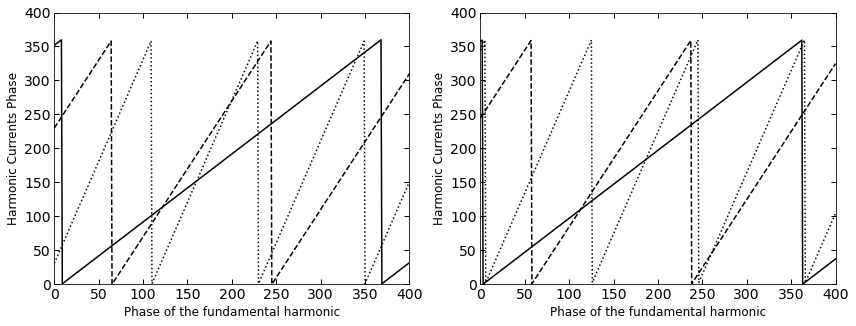

In [17]:
# Phase sweep
phase_range = np.linspace(0, 400, 401) / 180 * np.pi

colourlist = ['k', 'k--', 'k:']

phase1 = np.empty_like(phase_range)
phase2 = np.empty_like(phase_range)
phase3 = np.empty_like(phase_range)

for i, phase in enumerate(phase_range):

    # Set phase of local-oscillator
    cct.vt[1, 1] = cct.freq[1] * alpha * np.exp(1j * phase)
    cct.zt[1, 1] = 0.
    cct.zt[1, 2] = 0.
    cct.zt[1, 3] = 0.
    
    # Harmonic balance
    vj = qmix.harmonic_balance.harmonic_balance(cct, resp, num_b, verbose=False)
    
    # Calculate currents
    currents = qtcurrent(vj, cct, resp, freq_list, num_b, verbose=False)

    phase1[i] = np.angle(currents[1])
    phase2[i] = np.angle(currents[2])
    phase3[i] = np.angle(currents[3])

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(phase_range*180/np.pi, make_pos(phase1)*180/np.pi, colourlist[0])
plt.plot(phase_range*180/np.pi, make_pos(phase2)*180/np.pi, colourlist[1])
plt.plot(phase_range*180/np.pi, make_pos(phase3)*180/np.pi, colourlist[2])
plt.ylim([0, 400])
plt.xlim([0, 400])
plt.xlabel('Phase of the fundamental harmonic', fontsize=12)
plt.ylabel('Harmonic Currents Phase', fontsize=12)

for i, phase in enumerate(phase_range):

    # Set phase of local-oscillator
    cct.vt[1, 1] = cct.freq[1] * alpha * np.exp(1j * phase)
    cct.zt[1, 1] = 1.
    cct.zt[1, 2] = 1.
    cct.zt[1, 3] = 1.
    
    # Harmonic balance
    vj = qmix.harmonic_balance.harmonic_balance(cct, resp, num_b, verbose=False)
    
    # Calculate currents
    currents = qtcurrent(vj, cct, resp, freq_list, num_b, verbose=False)

    phase1[i] = np.angle(currents[1])
    phase2[i] = np.angle(currents[2])
    phase3[i] = np.angle(currents[3])

plt.subplot(122)
plt.plot(phase_range*180/np.pi, make_pos(phase1)*180/np.pi, colourlist[0])
plt.plot(phase_range*180/np.pi, make_pos(phase2)*180/np.pi, colourlist[1])
plt.plot(phase_range*180/np.pi, make_pos(phase3)*180/np.pi, colourlist[2])
plt.ylim([0, 400])
plt.xlim([0, 400])
plt.xlabel('Phase of the fundamental harmonic', fontsize=12)
plt.ylabel('Harmonic Currents Phase', fontsize=12);

# Figure 5.8

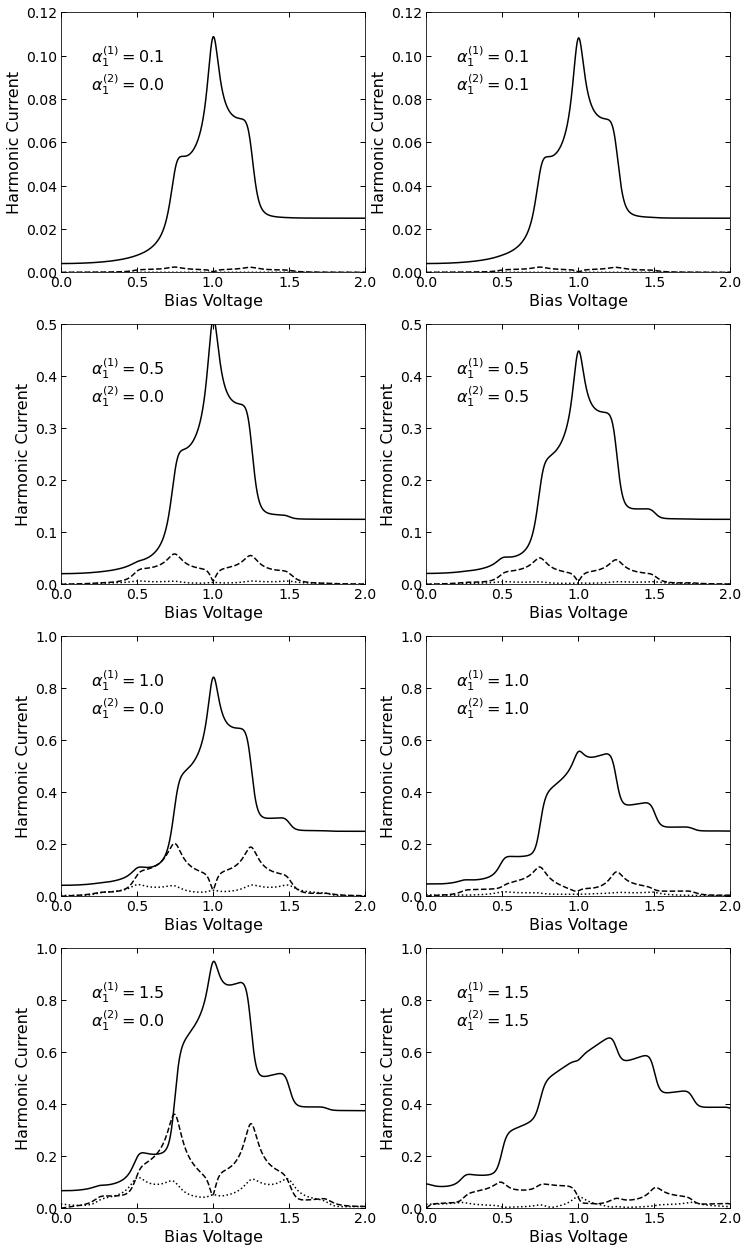

In [18]:
# Response function
resp = RespFnPolynomial(30, verbose=False)

num_f = 2   # Number of tones
num_p = 3   # Number of harmonics
num_b = 20  # Maximum order of Bessel function

# Embedding circuit
cct = qmix.circuit.EmbeddingCircuit(num_f, num_p, vb_npts=5001)

cct.freq[1] = 0.25
cct.freq[2] = 0.253

# Frequencies to calculate
freq_list = (cct.freq[1], cct.freq[1]*2, cct.freq[1]*3)

colourlist = ['k', 'k--', 'k:']

plt.figure(figsize=(12, 22))

a_list = [0.1, 0.5, 1.0, 1.5]
y_max  = [0.12, 0.5, 1, 1]

for i, a in enumerate(a_list):

    ax = plt.subplot(4, 2, i*2+1)
    cct.vt[1, 1] = cct.freq[1] * a

    # Harmonic Balance
    vj = harmonic_balance(cct, resp, num_b, verbose=False)

    # Calculate currents
    currents = qtcurrent(vj, cct, resp, freq_list, num_b, verbose=False)

    plt.plot(cct.vb, np.abs(currents[0,:]), 'k')
    plt.plot(cct.vb, np.abs(currents[1,:]), 'k--')
    plt.plot(cct.vb, np.abs(currents[2,:]), 'k:')

    msg = r'$\alpha_1^{{(1)}}={:.1f}$'.format(a)
    msg += '\n'
    msg += r'$\alpha_1^{{(2)}}=0.0$'
    plt.text(0.1, 0.7, msg, transform=ax.transAxes, fontsize=16)
    
    plt.xlabel('Bias Voltage', fontsize=16)
    plt.ylabel('Harmonic Current', fontsize=16)
    plt.ylim([0, y_max[i]])
    plt.xlim([0, 2])
    plt.xticks(np.arange(0, 2.1, 0.5))

for i, a in enumerate(a_list):
    
    ax = plt.subplot(4, 2, i*2+2)
    cct.vt[1, 1] = cct.freq[1] * a
    cct.vt[2, 1] = cct.freq[2] * a

    # Harmonic Balance
    vj = harmonic_balance(cct, resp, num_b, verbose=False)

    # Calculate currents
    currents = qtcurrent(vj, cct, resp, freq_list, num_b, verbose=False)

    plt.plot(cct.vb, np.abs(currents[0,:]), 'k')
    plt.plot(cct.vb, np.abs(currents[1,:]), 'k--')
    plt.plot(cct.vb, np.abs(currents[2,:]), 'k:')

    msg = r'$\alpha_1^{{(1)}}={:.1f}$'.format(a)
    msg += '\n'
    msg += r'$\alpha_1^{{(2)}}={:.1f}$'.format(a)
    plt.text(0.1, 0.7, msg, transform=ax.transAxes, fontsize=16)
    
    plt.xlabel('Bias Voltage', fontsize=16)
    plt.ylabel('Harmonic Current', fontsize=16)
    plt.ylim([0, y_max[i]])
    plt.xlim([0, 2])
    plt.xticks(np.arange(0, 2.1, 0.5));

# Figure 5.10

In [19]:
# Response function
resp = RespFnPolynomial(50, verbose=False)

In [20]:
num_f = 2   # Number of tones
num_p = 3   # Number of harmonics
num_b = 15  # Maximum order of Bessel function

# Embedding circuit
cct = qmix.circuit.EmbeddingCircuit(num_f, num_p)

cct.freq[1] = 0.5
cct.freq[2] = 0.3
cct.vt[1, 1] = cct.freq[1] * 1.2
cct.zt[1, 1] = 0.5
cct.zt[2, 1] = 0.5

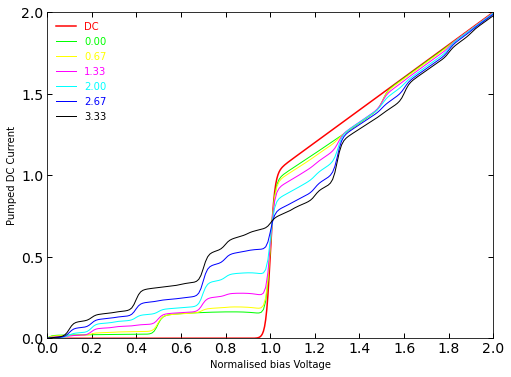

In [21]:
colourlist = ['lime', 'yellow', 'magenta', 'cyan', 'b', 'k']

plt.figure(figsize=(8,6))
plt.plot(resp.voltage, resp.current, 'r')
a_list = [0.00, 0.67, 1.33, 2.00, 2.67, 3.33]
for i, a in enumerate(a_list):

    cct.vt[2, 1] = cct.freq[2] * a

    # Harmonic Balance
    vj = harmonic_balance(cct, resp, num_b, verbose=False)

    # Calculate currents
    idc = qtcurrent(vj, cct, resp, 0., num_b, verbose=False)

    plt.plot(cct.vb, idc, colourlist[i], lw=1)

plt.legend(['DC'] + ["{:.2f}".format(a) for a in a_list], loc=2, frameon=False)

ltext = plt.gca().get_legend().get_texts()
plt.setp(ltext[0], color='r')
plt.setp(ltext[1], color=colourlist[0])
plt.setp(ltext[2], color=colourlist[1])
plt.setp(ltext[3], color=colourlist[2])
plt.setp(ltext[4], color=colourlist[3])
plt.setp(ltext[5], color=colourlist[4])
plt.setp(ltext[6], color=colourlist[5])

plt.xlabel('Normalised bias Voltage')
plt.ylabel('Pumped DC Current')
plt.xticks(np.arange(0, 2.1, 0.2))
plt.yticks(np.arange(0, 2.1, 0.5))
plt.ylim([0, 2])
plt.xlim([0, 2]);

# Figure 5.11

In [22]:
# Response function
resp = RespFnPolynomial(50, verbose=False)

In [23]:
num_b = 15  # Maximum order of Bessel function

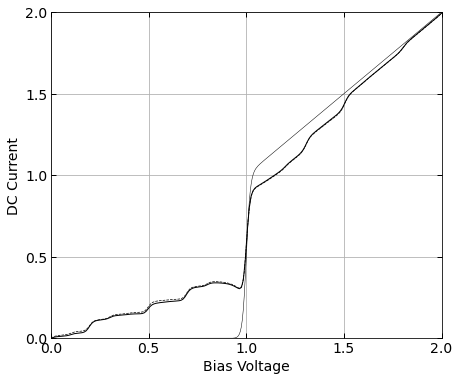

In [25]:
plt.figure(figsize=(7,6))

# Embedding circuit
num_f = 2   # Number of tones
num_p = 1   # Number of harmonics
cct = qmix.circuit.EmbeddingCircuit(num_f, num_p)
cct.freq[1] = 0.5
cct.freq[2] = 0.3
cct.vt[1, 1] = cct.freq[1] * 2.
cct.vt[2, 1] = cct.freq[2] * 2.
cct.zt[1, 1] = 1.
cct.zt[2, 1] = 1.

vj = harmonic_balance(cct, resp,   num_b, verbose=False)  # Harmonic Balance
idc = qtcurrent(vj, cct, resp, 0., num_b, verbose=False)  # Calculate currents

plt.plot(resp.voltage, np.real(resp.current), 'k', linewidth=0.5)
plt.plot(cct.vb, idc, 'k--', linewidth=0.7, label='1 harmonic')

# Embedding circuit
num_f = 2   # Number of tones
num_p = 3   # Number of harmonics
cct = qmix.circuit.EmbeddingCircuit(num_f, num_p, vb_min=0.01)
cct.freq[1] = 0.5
cct.freq[2] = 0.3
cct.vt[1, 1] = cct.freq[1] * 2.
cct.vt[2, 1] = cct.freq[2] * 2.
cct.zt[1, 1] = 1.
cct.zt[2, 1] = 1.
cct.zt[1, 2] = 1.
cct.zt[1, 3] = 1.
cct.zt[2, 2] = 1.
cct.zt[2, 3] = 1.

vj = harmonic_balance(cct, resp,   num_b, verbose=False)  # Harmonic Balance
idc = qtcurrent(vj, cct, resp, 0., num_b, verbose=False)  # Calculate currents

plt.plot(cct.vb, idc, 'k', linewidth=1., label='3 harmonics')

plt.xlabel('Bias Voltage', fontsize=14)
plt.ylabel('DC Current', fontsize=14)
plt.ylim([0, 2])
plt.xlim([0, 2])
plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(0, 2.1, 0.5))
# plt.legend(loc=0)
plt.grid();